In [1]:
import pandas as pd

# Carico il dataset
dataset = pd.read_csv("complete_covidcases.csv")

# Visualizzo le dimensioni del dataset
print("Dimensioni del dataset:")
print(dataset.shape)

# Visualizzo i metadati del dataset
print("\nMetadati del dataset:")
print(dataset.info())


Dimensioni del dataset:
(387249, 67)

Metadati del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387249 entries, 0 to 387248
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387249 non-null  object 
 1   continent                                   368722 non-null  object 
 2   location                                    387249 non-null  object 
 3   date                                        387249 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths

In [2]:
# Filtro il dataset per escludere le locazioni senza continente definito
dataset_continents = dataset.dropna(subset=['continent'])

# Calcolo il numero di casi totali per ogni continente
cases_by_continent = dataset_continents.groupby('continent')['total_cases'].sum()

# Visualizzo il numero di casi totali per ogni continente
print("Numero di casi totali per continente:")
print(cases_by_continent)


Numero di casi totali per continente:
continent
Africa           1.277678e+10
Asia             2.099663e+11
Europe           2.013888e+11
North America    1.096626e+11
Oceania          9.506027e+09
South America    6.384417e+10
Name: total_cases, dtype: float64


In [3]:
# Continenti dati
continente1 = 'Asia'
continente2 = 'Europe'

# Filtro il dataset per i due continenti specificati
continent1_data = dataset[dataset['continent'] == continente1]
continent2_data = dataset[dataset['continent'] == continente2]

# Calcolo il massimo, la media e la percentuale rispetto al numero totale di casi nel mondo
# per il primo continente
max_cases_continent1 = continent1_data['total_cases'].max()
mean_cases_continent1 = continent1_data['total_cases'].mean()
percent_cases_continent1 = continent1_data['total_cases'].sum() / dataset['total_cases'].sum() * 100

# per il secondo continente
max_cases_continent2 = continent2_data['total_cases'].max()
mean_cases_continent2 = continent2_data['total_cases'].mean()
percent_cases_continent2 = continent2_data['total_cases'].sum() / dataset['total_cases'].sum() * 100

# Visualizza i risultati
print("Descrittori statistici per", continente1)
print("Massimo numero di casi:", max_cases_continent1)
print("Media dei casi:", mean_cases_continent1)
print("Percentuale rispetto ai casi totali nel mondo:", percent_cases_continent1, "%")

print("\nDescrittori statistici per", continente2)
print("Massimo numero di casi:", max_cases_continent2)
print("Media dei casi:", mean_cases_continent2)
print("Percentuale rispetto ai casi totali nel mondo:", percent_cases_continent2, "%")


Descrittori statistici per Asia
Massimo numero di casi: 99343195.0
Media dei casi: 3183043.071478382
Percentuale rispetto ai casi totali nel mondo: 8.160453988769802 %

Descrittori statistici per Europe
Massimo numero di casi: 38997490.0
Media dei casi: 2669240.0210873713
Percentuale rispetto ai casi totali nel mondo: 7.827087371139517 %


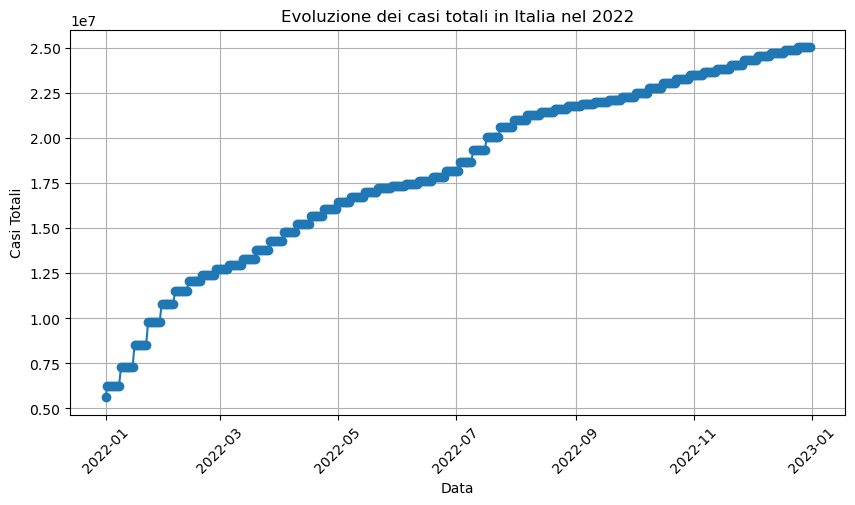

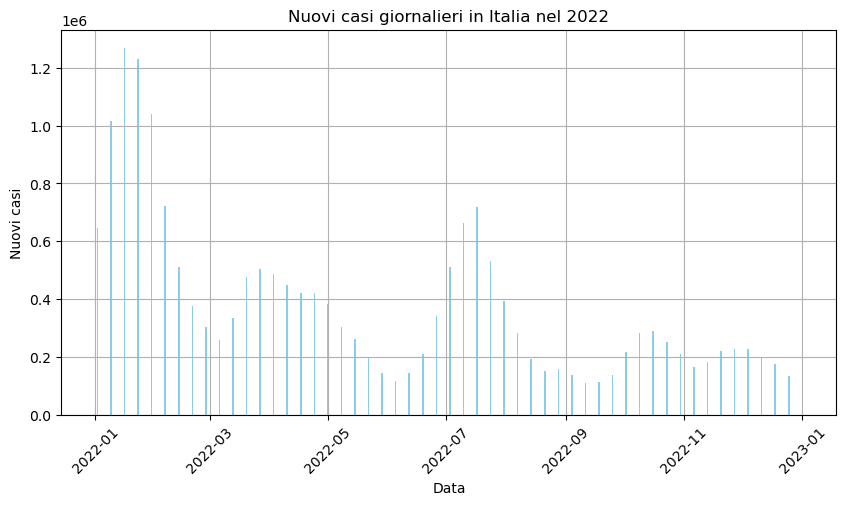

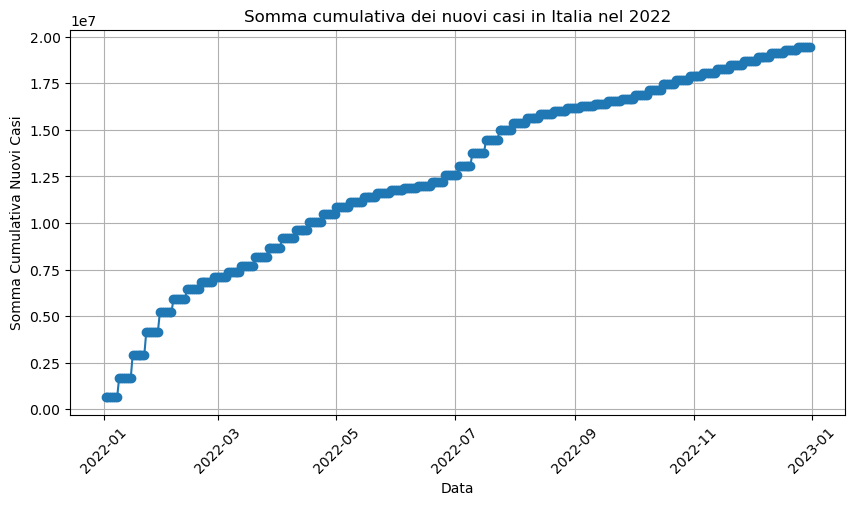

In [5]:
import matplotlib.pyplot as plt

# Filtro i dati relativi all'Italia nel 2022
italy_2022_data = dataset[(dataset['location'] == 'Italy') & (dataset['date'].str.startswith('2022'))].copy()

# Convertito la colonna 'date' in formato datetime
italy_2022_data['date'] = pd.to_datetime(italy_2022_data['date'])

# Grafico dell'evoluzione dei casi totali rispetto alla data
plt.figure(figsize=(10, 5))
plt.plot(italy_2022_data['date'], italy_2022_data['total_cases'], marker='o', linestyle='-')
plt.title('Evoluzione dei casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calcola i nuovi casi giornalieri
italy_2022_data['nuovi_casi'] = italy_2022_data['total_cases'].diff()

# Grafico del numero di nuovi casi rispetto alla data
plt.figure(figsize=(10, 5))
plt.bar(italy_2022_data['date'], italy_2022_data['nuovi_casi'], color='skyblue')
plt.title('Nuovi casi giornalieri in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Grafico della somma cumulativa dei nuovi casi nel 2022
plt.figure(figsize=(10, 5))
plt.plot(italy_2022_data['date'], italy_2022_data['nuovi_casi'].cumsum(), marker='o', linestyle='-')
plt.title('Somma cumulativa dei nuovi casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


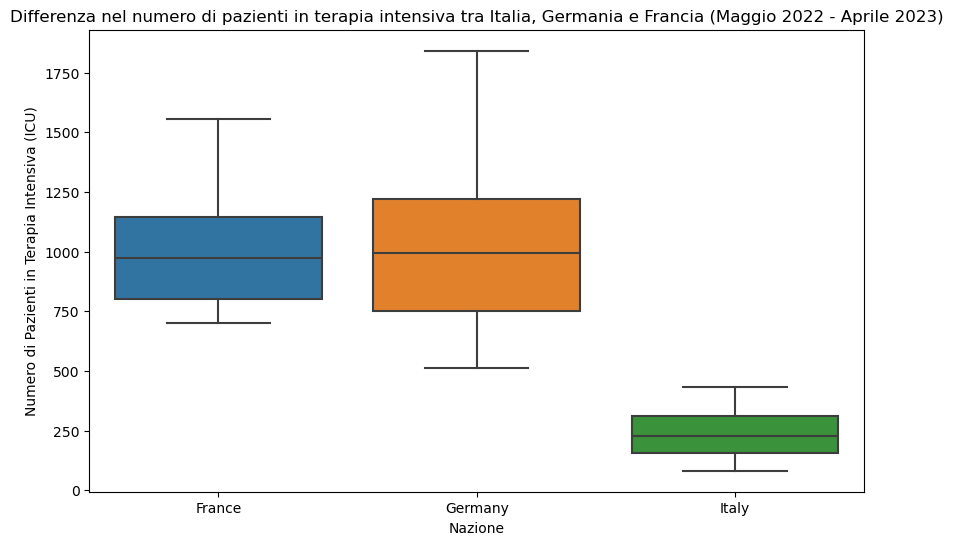

In [6]:
import seaborn as sns

# Filtrato i dati per le nazioni di Italia, Germania e Francia nel periodo specificato
selected_countries_data = dataset[(dataset['location'].isin(['Italy', 'Germany', 'France'])) & 
                                  (dataset['date'].between('2022-05-01', '2023-04-30'))]

# Creato il boxplot per visualizzare la distribuzione del numero di pazienti in terapia intensiva per le nazioni selezionate
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=selected_countries_data)
plt.title('Differenza nel numero di pazienti in terapia intensiva tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU)')
plt.show()

# Il boxplot mostra la distribuzione del numero di pazienti in terapia intensiva per Italia, Germania e Francia da maggio 2022 ad aprile 2023. La mediana nei box indica la tendenza centrale dei dati per ciascuna nazione, mentre la lunghezza dei box rappresenta la variabilità dei dati. 
#Le "whiskers" mostrano la distribuzione estesa dei dati, escludendo gli outlier.
#Confrontando i boxplot, possiamo vedere direttamente i livelli di pazienti in terapia intensiva tra le nazioni. 
# Ad esempio, se un paese ha una mediana più alta e una variazione maggiore, potrebbe indicare una situazione più critica o una capacità inferiore del sistema sanitario nel gestire i pazienti in terapia intensiva.


In [14]:
# Filtrare i dati per le nazioni di Italia, Germania, Francia e Spagna nel 2023
selected_countries_2023_data = dataset[(dataset['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
                                       (dataset['date'].str.startswith('2023'))]

# Confermare che il nome della colonna sia corretto
hospitalized_column = 'hosp_patients'

# Calcolo  somma dei pazienti ospedalizzati per ogni nazione
hospitalized_patients_sum = selected_countries_2023_data.groupby('location')[hospitalized_column].sum()

# Verifico se ci sono dati nulli nella colonna 'hosp_patients'
if selected_countries_2023_data[hospitalized_column].isnull().any():
    print("Ci sono dati nulli nella colonna 'hosp_patients'.")

    #  Percentuale di dati nulli rispetto al totale dei dati
    null_percentage = (selected_countries_2023_data[hospitalized_column].isnull().sum() / len(selected_countries_2023_data)) * 100
    print(f"Percentuale di dati nulli: {null_percentage:.2f}%")

    # Suggerimento sulla gestione dei dati nulli
    if null_percentage < 5:
        print("La percentuale di dati nulli è bassa. Potrebbe essere ragionevole sostituire i valori nulli con il valore medio o mediano della colonna.")
    else:
        print("La percentuale di dati nulli è alta. Potrebbe essere necessario valutare la rimozione delle righe con dati nulli o utilizzare altre strategie di gestione dei dati mancanti.")

#  somma dei pazienti ospedalizzati per ogni nazione nel 2023
print("\nSomma dei pazienti ospedalizzati per nazione nel 2023:")
print(hospitalized_patients_sum)

Ci sono dati nulli nella colonna 'hosp_patients'.
Percentuale di dati nulli: 57.74%
La percentuale di dati nulli è alta. Potrebbe essere necessario valutare la rimozione delle righe con dati nulli o utilizzare altre strategie di gestione dei dati mancanti.

Somma dei pazienti ospedalizzati per nazione nel 2023:
location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64
